In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
#membaca dataset dan mengubah jadi data frame
df = pd.read_csv('Mall_Customers.csv')

In [5]:
#ubah file csv jadi data frame
df1 = pd.read_csv('Mall_Customers.csv')

#tampilkan 3 baris pertama
df1.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:
#melakukan preprocessing agar nama kolom seragam
df1 = df.rename(columns={'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'annual_income', 'Spending Score (1-100)' : 'spending_score'})

#ubah data kategorik jadi numerik (gender)
df1['gender'].replace(['Female', 'Male'], [0, 1], inplace = True)

#tampilkan data yang sudah di preprocessing
df1.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [8]:
from sklearn.cluster import KMeans

#menghilangkan kolom kostumer dan gender
x = df1.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inersia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

Text(0, 0.5, 'inersia')

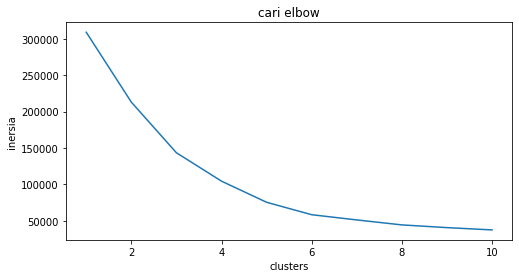

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#membuat plot inersia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('cari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inersia')

#hasil pada gambar menunjukan K=5 karena setelah 5 penurunan signifikan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


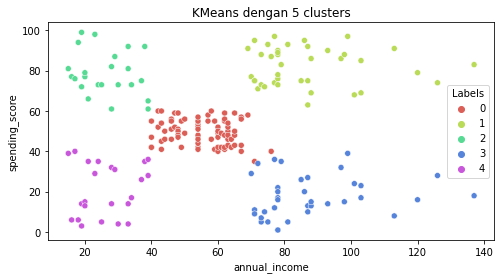

In [13]:
#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

#menambahkan kolom label pada data set
x['Labels'] = km5.labels_

#membuat plot KMeans dengan 5 kluster
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'], palette = sns.color_palette('hls',5))
plt.title('KMeans dengan 5 clusters')
plt.show()